<a href="https://colab.research.google.com/github/LARP28/SIM_YAC_ROMAN_UPSE2023/blob/main/Implicito_cuestionario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Luis Roman

***Intento 1***

In [ ]:
import numpy  as np
import math


*Esquema Implicito-25-27***


In [ ]:
L=30000                                               ## Longitud del yacimiento
dx=6000                                               ## Diferenicial X
Tiempo=360                                            ## Tiempo total (días)
DT=72                                                 ## Diferencial de tiempo
Alpha=1                                               ## V alor constante
Etha=Alpha*DT/(dx**2)                                 ## Constante adimensional
Pext=2000                                             ## Presion en la mitad del yacimiento

In [ ]:
Distance= np.arange(0,L,dx)                           ## Se crea arreglo Distance que va de cero a L en intervalos de DX
P01=np.ones_like(Distance)                            ## Se crea el arreglo P01 semejante al Distancie en cuyo arreglo se llena con numeros 1
PYac=2000                                             ## Ingresamos la presion del yacimiento
PFrontd=0                                             ## Frontera derecha con valor de cero
PFronti=0                                             ## Frontera izquierda con valor cero
P01=P01*PYac                                          ## Reasigamos el valor de P01 que ahora va a se el arreglo P01 multiplicado por la presion del yacimiento,
                                                      ## para llenar la primera fila con los valores iniciales de presion
P01[0]=PFronti                                        ## En la posicion inicial del del arreglo P01 se coloca el en valor de la presion de frontera izquierda
P01[len(P01)-1]=PFrontd                               ## Ahora en la ultima posicion del arreglo P01  se coloca el valor de la frontera derecha
N=len(Distance)                                       ## Creamos un vector N de longitud igual al arreglo Distance
VectorTiempo=np.arange(0,(Tiempo//DT)*DT,DT)          ## Creamos el arreglo VectorTiempo con un arreglo que va de 0 hasta Tiempo, en intervalos de DT

In [ ]:
P01

array([   0, 2000, 2000, 2000, 1000])

In [ ]:
PM=np.zeros([len(VectorTiempo),N])                    ## Creamos el arreglo PM que se llena con numeros 0
                                                      ## en toda la longitud del vector tiempo hasta N que es la longitud de Distance
PA=np.zeros([len(VectorTiempo),N])                    ## Creamos el arreglo PA similar al vector PM
PM.shape

A=np.zeros([N-2, N-2])                                ## Creamos la matriz "A" que es cuadrada con filas y columnas de la longitud del arreglo Distance menos 2
M=np.zeros([N-2, N-2])                                ## Creamos la matriz "M" que es cuadrada con filas y columnas de la longitud del arreglo Distance menos 2
d=np.zeros(N-2)                                       ## Creamos un arreglo "d" lleno de ceros de una sola fila
d[1]=Pext
d

array([   0., 2000.,    0.])

In [ ]:
## Matriz A

for i in range(N-2) :                                 ## Creamos el ciclo for que inicia en i en el rango de la longitud de Distace menos 2
  A[i,i]=1-2*Etha                                     ## En la matriz A en las posiciones en que las filas y las columnas sean iguales
                                                      ## se aplica el valor correspondiente a la diagonal principal
  if i>0:                                             ## En las posiciones de las filas y las columnas que no son iguales, y si i es mayor que cero pasa a llenar de cauerdo a lo siguiente:
    A[i,i-1]=Etha                                     ## En las posiciones de la matriz de i y de i-1 se va a colocar el valor de Lambda
  if i<(N-3):                                         ## Si las posicion i es menor que la posiicion de la longitud restada en 3 entonces:
    A[i,i+1]=Etha                                     ## En la matriz A de posiciones i e i+1 tambien va a colocar el valor de Lambda


## Matriz M

b=Alpha/(2*dx**2)                                     ## Se define el valor de b por medio del valor de Alpha y el dx para ingresar en el ciclo for
for i in range(N-2) :                                 ## Para el elemento i en el rango de Distance-2
  M[i,i]=1/DT -2*b                                    ## En la matriz M en las posiciones de igual fila e igual columna, el valor en esta se calcula de acuerdo a esta linea
  if i>0:                                             ## Cuando i sea mayor que cero,
    M[i,i-1]=b                                        ## En la matriz se va a llenar el valor de b, solo en las posiciones que tengan como filas de i y columnas i-1
  if i<(N-3):                                         ## En el caso que i sea el valor de la la longitud de Distance menos 3 ,
    M[i,i+1]=b                                        ## Se coloca el valor de b solo en las posiciones que tengan como filas de i y columnas i+1





In [ ]:
def filld(Pn):                                        ## Se define que se va a con un parametro Pn
  d=np.zeros(N-2)                                     ## Se crea un vector cuyo arreglo va estar lleno de ceros en una longitud de Distance -2
  for i in range(N-2):                                ## Se inicia un ciclo for para que el valor de i en el rango anterior especificado haga lo siguiente
    d[i]=b*Pn[i] +(1/DT-2*b)*Pn[i+1]+b*Pn[i+2]        ## En la posicion i el valor de d va calculando los valores de las presiones
  return d                                            ## retorna el valor de d para que siga realizando el calculo

d

array([   0., 2000.,    0.])

In [ ]:
Pcal=np.linalg.solve(A,P01[1:-1])                     ## Se va a realizar la operacion de de matrices cuya matriz resultado la llamamos Pcal
Pcal[1]=Pext
Pcal

Pfin=np.concatenate(([PFronti],Pcal,[PFrontd]))       ## Realizamos una concatenacion de los valores de presiones de fronteras y la calculada
Pfin


array([   0.        , 2000.00400002, 2000.        , 2000.00400002,
       1000.        ])

In [ ]:
PM[0]=Pfin                                            ## En la posicion cero del arreglo PM de soloca el valor de P01
PA[0]=Pfin                                            ## En la posicion cero de  del arreglo PA  se coloca el valor de P01
Pactual=Pfin                                          ## Se crea el arreglo Pactual que va a tener los valores de P01
Pactual2=Pfin                                         ## Se crea otro arreglo Pactaul2 que tambien tiene los valores de P01
for t in range(1,Tiempo//DT):                         ## Ingresamos a un ciclo for identificando a t en el rango de filas posicion 1 y la columna de posicion  Tiempo//DT
  d=filld(Pactual)                                    ## Llamamos al arreglo d para que sea llenado en base a los valores de Pactual
  Pcal=np.linalg.solve(M,d)                           ## Se resuelve la operacion de matrices entre M y d para obtener Pcal
  Pcal2=np.linalg.solve(A,Pactual2[1:-1])             ## Se resuelve la operacion de matrices entre A y el arreglo Pcatual2 con longitud de posiciones de  1 a -1
  Pactual2=np.concatenate(([PFronti],Pcal2,[PFrontd])) ## Se concatena para que el arreglo Pactual2
  Pactual=np.concatenate(([PFronti],Pcal,[PFrontd]))  ## Se concatena para que el arreglo Pactual
  PM[t]=Pactual                                       ## En los valores de t en el rango seleccionado se va ir llenando la matriz PM con los valores de Pcal
  PA[t]=Pactual2                                      ## En los valores de t en el rango seleccionado se va ir llenando la matriz PA con los valores de Pcal2

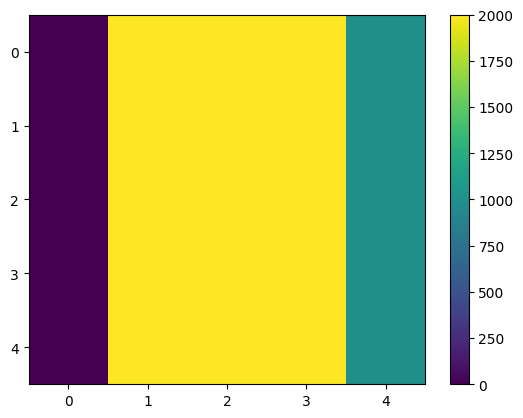

In [ ]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(PM,aspect='auto')                ## Se garfica en myplotlib los valores de presiones obtenidos con respecto a la matriz PM
plt.colorbar()

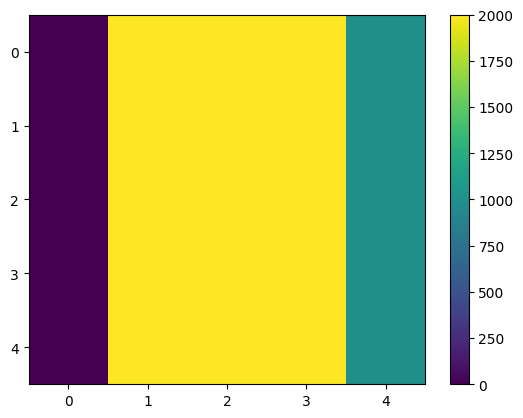

In [ ]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(PA,aspect='auto')# se crea la imagen de la matriz PA
plt.colorbar()